In [55]:
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import pandas as pd

In [81]:
data = pd.read_csv("dane.csv", sep=";")
wierz = pd.read_csv("wierz.csv", sep=";")

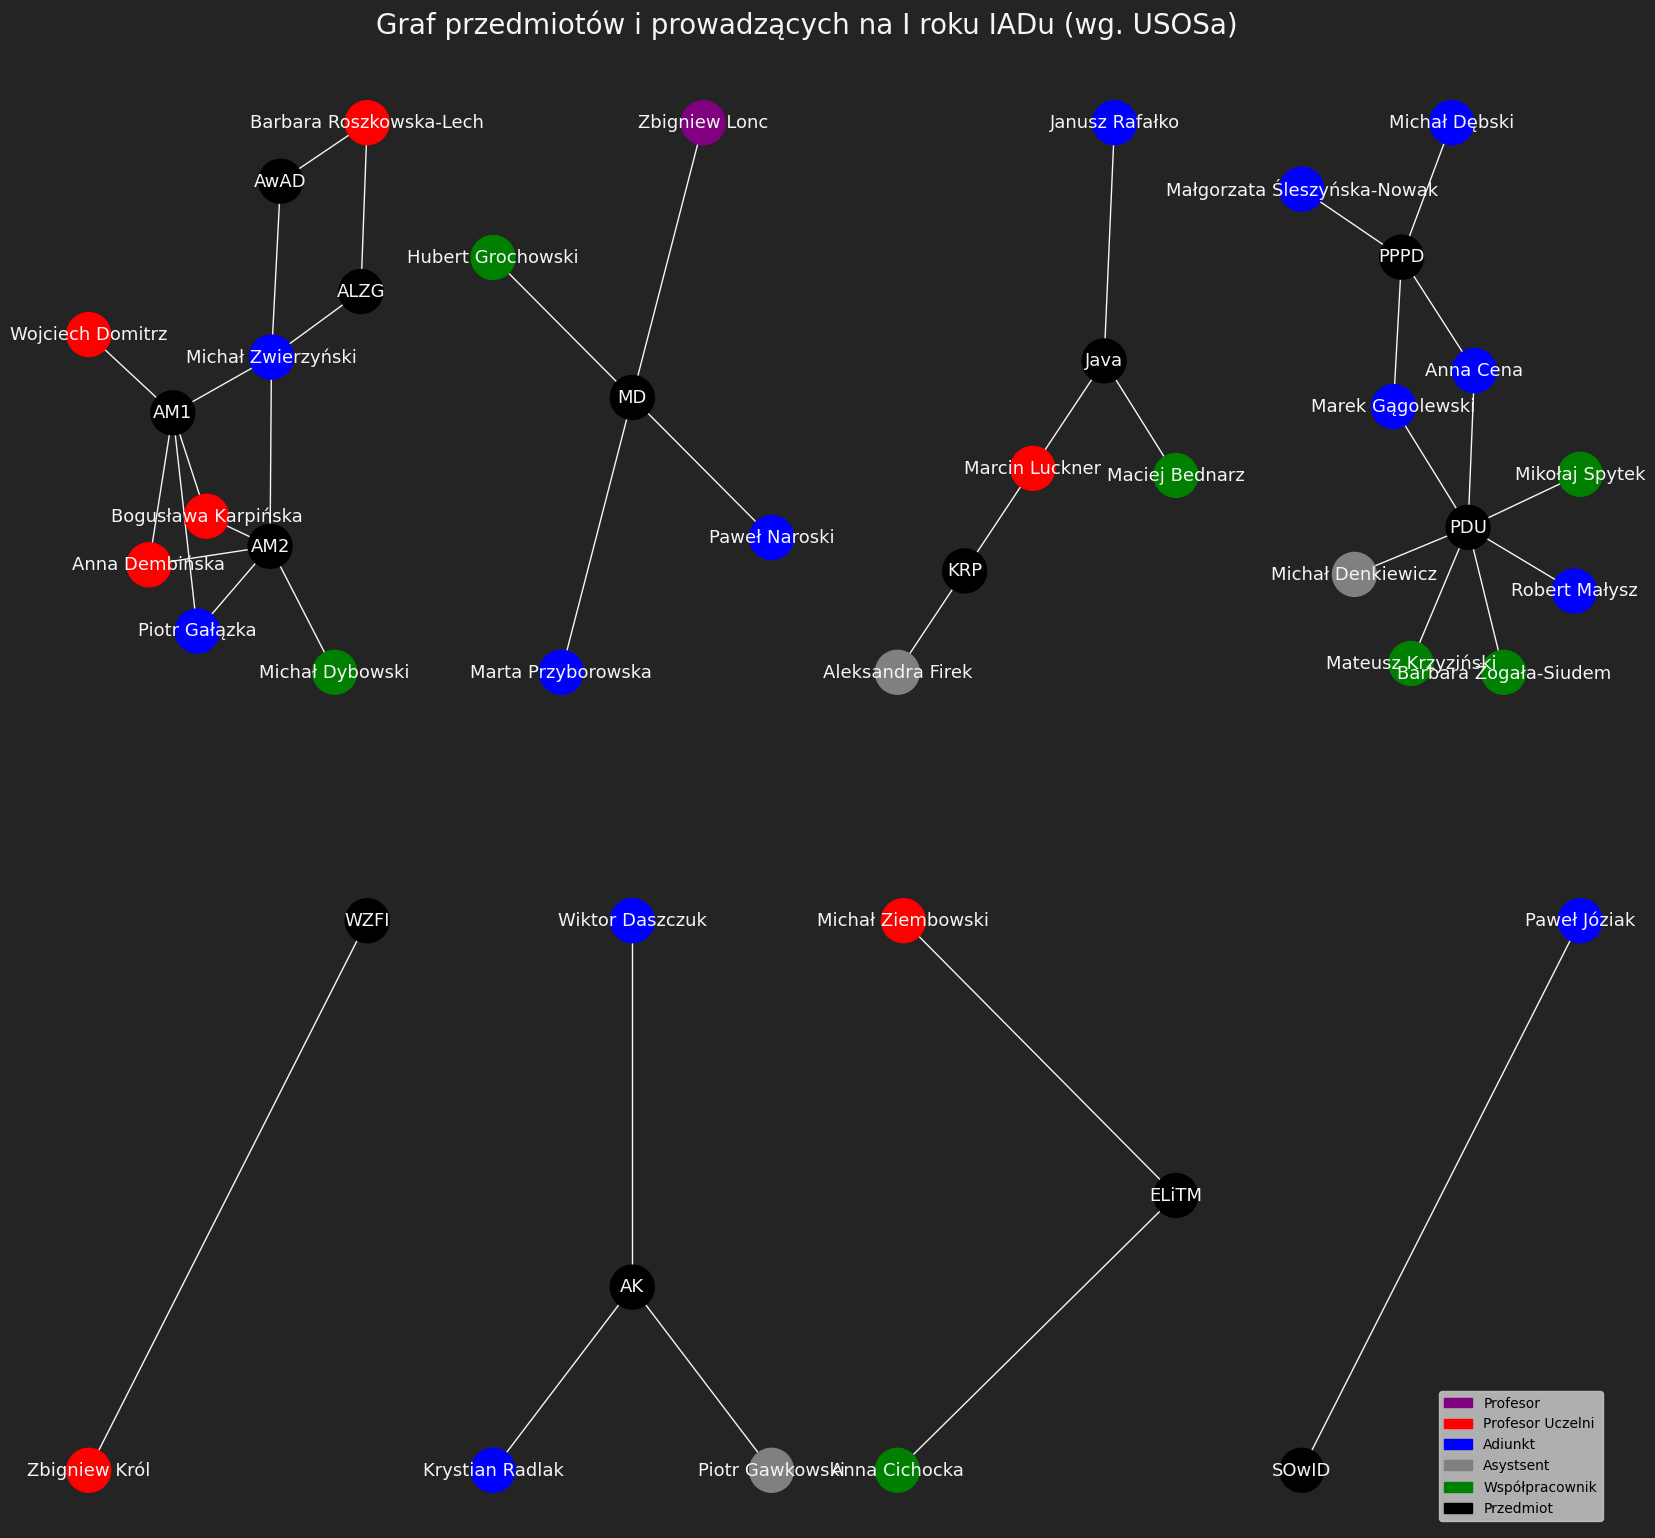

In [83]:
G = nx.from_pandas_edgelist(data, "Osoba", "Przedmiot")
for _, row in wierz.iterrows():
    G.add_node(row['Osoba'], color=row['kolor'])


connected_components = list(nx.connected_components(G.to_undirected()))
fig, axes = plt.subplots(2, 4, figsize=(20,19))
axes = axes.flatten()

p = mpatches.Patch(color='purple', label='Profesor')
pu = mpatches.Patch(color='red', label='Profesor Uczelni')
a = mpatches.Patch(color='blue', label='Adiunkt')
asy = mpatches.Patch(color='gray', label='Asystsent')
w = mpatches.Patch(color='green', label='Współpracownik')
pr = mpatches.Patch(color='black', label='Przedmiot')

plt.legend(handles=[p,pu,a,asy,w,pr],loc='lower right',facecolor="lightgray")
axes[0].text(0.8,1.3,"Graf przedmiotów i prowadzących na I roku IADu (wg. USOSa)", fontsize=20,color="whitesmoke")

for i, component in enumerate(connected_components):
    subgraph = G.subgraph(component)
    node_colors = [subgraph.nodes[node]['color'] for node in subgraph.nodes]
    pos = nx.kamada_kawai_layout(subgraph)
    nx.draw(subgraph,pos=pos,node_color=node_colors,edge_color="whitesmoke",  ax=axes[i],node_size=1000)
    for j, (node, (x, y)) in enumerate(pos.items()):
        axes[i].text(x, y , node, fontsize=13 , ha="center", va="center",color="whitesmoke")


fig.set_facecolor("#242424")

#fig.savefig('graf.png')
